# Feature Extraction

#### Feature extraction is the process of extracting useful features from data in a format that can be utilized by machine learning algorithms.


##### from http://scikit-learn.org/stable/modules/feature_extraction.html
> Note:<br>
<b>Feature extraction</b> is very different from <b>Feature selection</b>: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features. 

## Extracting Features from Text

##### From C. C. Aggarwal, Machine Learning for Text. Cham: Springer International Publishing, 2018.
> The ordering of words in a document provides a semantic meaning that cannot be
inferred from a representation based on only the frequencies of words in that document.
Nevertheless, it is still possible to make many types of useful predictions without inferring
the semantic meaning. There are two feature representations that are popularly used in
mining applications:<br>
1. Text as a bag-of-words: This is the most commonly used representation for text mining.
In this case, the ordering of the words is not used in the mining process. The set
of words in a document is converted into a sparse multidimensional representation,
which is leveraged for mining purposes. Therefore, the universe of words (or terms)
corresponds to the dimensions (or features) in this representation. For many applications
such as classification, topic-modeling, and recommender systems, this type of
representation is sufficient.<br>
<br>
2. Text as a set of sequences: In this case, the individual sentences in a document are
extracted as strings or sequences. Therefore, the ordering of words matters in this
representation, although the ordering is often localized within sentence or paragraph
boundaries. A document is often treated as a set of independent and smaller units (e.g.,
sentences or paragraphs). This approach is used by applications that require greater
semantic interpretation of the document content. This area is closely related to that
of language modeling and natural language processing. The latter is often treated as a
distinct field in its own right.
Text mining has traditionally focused on the first type of representation, although recent
years have seen an increasing amount of attention on the second representation. This is
primarily because of the increasing importance of artificial intelligence applications in which
the language semantics, reasoning, and understanding are required. For example, questionanswering
systems have become increasingly popular in recent years, which require a greater
degree of understanding and reasoning.

#### In this class, we will focus only on the bag-of-words representation. A class in Natural Language Processing will offer more exposure to the second type. <br>Recall what I covered in the Intro to NLP lecture. What are the first steps?

##### From http://scikit-learn.org/stable/modules/feature_extraction.html

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
<br><br>
In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:
- tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
- counting the occurrences of tokens in each document.
- normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.
<br><br>

> In this scheme, features and samples are defined as follows:
- each individual token occurrence frequency (normalized or not) is treated as a feature.
- the vector of all the token frequencies for a given document is considered a multivariate sample.
<br><br>

> A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.
<br><br>
We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [1]:
example_sentences = ['Bob is a man and Bob is happy.', 
                     'Sally is a woman and Sally is happy and Sally is not a man.', 
                     'Fido is a dog and Fido is happy.']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
cv = CountVectorizer(lowercase=True)

In [4]:
data = cv.fit_transform(example_sentences)
data

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [6]:
data.toarray()

array([[1, 2, 0, 0, 1, 2, 1, 0, 0, 0],
       [2, 0, 0, 0, 1, 3, 1, 1, 3, 1],
       [1, 0, 1, 2, 1, 2, 0, 0, 0, 0]], dtype=int64)

In [7]:
cv.get_feature_names()

['and', 'bob', 'dog', 'fido', 'happy', 'is', 'man', 'not', 'sally', 'woman']

#### Why isn't 'a' included in the features?
Read the docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [8]:
cv = CountVectorizer(lowercase=True, stop_words='english')
data = cv.fit_transform(example_sentences)
print(data.toarray())
cv.get_feature_names()

[[2 0 0 1 1 0 0]
 [0 0 0 1 1 3 1]
 [0 1 2 1 0 0 0]]


['bob', 'dog', 'fido', 'happy', 'man', 'sally', 'woman']

In [8]:
cv = CountVectorizer(lowercase=True, stop_words='english', max_features=3)
data = cv.fit_transform(example_sentences)
print(data.toarray())
cv.get_feature_names()

[[2 1 0]
 [0 1 3]
 [0 1 0]]


['bob', 'happy', 'sally']

#### There are cases when you only care if a word is present or not. In that case, your features would be binary (0 or 1).

In [9]:
cv = CountVectorizer(lowercase=True, stop_words='english', max_features=3, binary=True)
data = cv.fit_transform(example_sentences)
print(data.toarray())
cv.get_feature_names()

[[1 1 1]
 [0 1 1]
 [0 1 0]]


['bob', 'happy', 'man']

#### Why are the different features chosen?

Read the docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


### n-grams

In [10]:
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(2, 2))
data = cv.fit_transform(example_sentences)
print(data.toarray())
cv.get_feature_names()

[[1 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 1 1]
 [0 0 1 1 1 0 0 0 0 0 0]]


['bob happy',
 'bob man',
 'dog fido',
 'fido dog',
 'fido happy',
 'happy sally',
 'man bob',
 'sally happy',
 'sally man',
 'sally woman',
 'woman sally']

#### If your machine is having trouble loading all of the words into memory using CountVectorizer, consider using HashingVectorizer instead.
http://scikit-learn.org/stable/modules/feature_extraction.html#vectorizing-a-large-text-corpus-with-the-hashing-trick
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html

You should take the time to look at all of the parameters for the CountVectorizer class. You can filter a lot of the words by using things like max_df, min_df, max_features. Be sure you take the time to understand what these parameters control. You can use cross-validation to determine which parameter settings give your model the best (or good enough results). Hyperparameters need to be tuned in the feature extraction and preprocessing steps as well. In the next lecture, we will also cover the TfIdfVectorizer which can also help you to choose better features (and less of them).

You should also take the time to understand why you might want to normalize the feature vectors. Think about this. If you are going to use the frequency of the words for your bag-of-words representation, you're telling the machine learning algorithm it should consider how many times each word appears in the text (a sentence, a paragraph, a review, a document, etc.). If you  the text data you have varies in length from example to example, won't bigger documents have higher counts for some words just because there are more words? Normalization helps to remove this effect. How? Why is this good? Go forth and Google! <br> You'll notice that CountVectorizer has a norm parameter.

# Preprocessing

#### While scikit's CountVectorizer makes transforming text into a bag-of-words representation fairly easy. You may find that you want to choose specific types of words instead or transform the words into more meaningful forms.

By now you should already know how to tokenize text into sentences and words. You also know how use spaCy to determine the parts of speech, dependency relations, noun chunks, and Named Entity types. Use this knowledge to your advantage where it makes sense.

In [10]:
example_sentences = ['Excellent phone and excellent service',
                     'I am a business user who heavily depends on mobile service',
                     'Good phone but bad service',
                     'One of the worse phones I have ever had',
                     'I bought this phone a week ago',
                     'I am very disappointed with this device',
                     'This is a good phone with many good features']

In [11]:
import spacy

nlp = spacy.load('en')

In [13]:
def noun_adj_verb_filter(sentences):
    """
    Only keep nouns, adjectives, and verbs in the sentence.
    """
    preprocessed_sentences = []
    keep_types = {'NOUN', 'PROPN', 'ADJ', 'VERB'}
    
    for sentence in sentences:
        doc = nlp(sentence)
        
        keep_tokens_string = ' '.join([t.text for t in doc if t.pos_ in keep_types])
        preprocessed_sentences.append(keep_tokens_string)
    
    return preprocessed_sentences

In [14]:
preproc_sents = noun_adj_verb_filter(example_sentences)
preproc_sents

['Excellent phone excellent service',
 'am business user who depends mobile service',
 'Good phone bad service',
 'worse phones have had',
 'bought phone week',
 'am disappointed device',
 'is good phone many good features']

In [15]:
cv = CountVectorizer(lowercase=True, stop_words='english',)
data = cv.fit_transform(preproc_sents)
print(data.toarray())
cv.get_feature_names()

[[0 0 0 0 0 0 2 0 0 0 1 0 1 0 0 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 0 1 0 0 0 0 0]]


['bad',
 'bought',
 'business',
 'depends',
 'device',
 'disappointed',
 'excellent',
 'features',
 'good',
 'mobile',
 'phone',
 'phones',
 'service',
 'user',
 'week',
 'worse']

Notice that some of the words are pretty useless (they don't give your model any information about whether or not the phone is good or bad. These could be added to a list of stopwords. However, don't just blindly do this because you see me doing it. It really depends on what you're trying to accomplish with your model. Say you want to predict the rating a user will give based on how he/she feels about certain aspects of the phone such as the service, the phone itself, the call quality, etc. Then those features are important to your model. Maybe your model will learn that when people mention the word phone with positive words, their overall sentiment is more positive than when positive words occur only with words such as service. Think before you do things. Think after you do things. Data Science is very much trial and error.

In [16]:
stop_words = {'phone', 'mobile', 'user', 'week'}

def noun_adj_verb_filter(sentences, stop_words=None):
    """
    Only keep nouns, adjectives, and verbs in the sentence. 
    Return the lemmatized form of the words.
    """
    preprocessed_sentences = []
    keep_types = {'NOUN', 'PROPN', 'ADJ', 'VERB'}
    
    for sentence in sentences:
        doc = nlp(sentence)
        
        if stop_words is not None:
            keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in keep_types and t.lemma_ not in stop_words])
        else:
            keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in keep_types])
        preprocessed_sentences.append(keep_tokens_string)
    
    return preprocessed_sentences

In [17]:
preproc_sents = noun_adj_verb_filter(example_sentences, stop_words=stop_words)
cv = CountVectorizer(lowercase=True, stop_words='english',)
data = cv.fit_transform(preproc_sents)
print(data.toarray())
cv.get_feature_names()

[[0 0 0 0 0 0 2 0 0 1]
 [0 1 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 0]]


['bad',
 'business',
 'buy',
 'depend',
 'device',
 'disappointed',
 'excellent',
 'feature',
 'good',
 'service']

### Building Custom Transformers in Scikit

Scikit-learn has a wonderful API that allows you to build custom estimators and transformers that work in an identical manner to the ones included in scikit. They can be used together easily.

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences 

In [22]:
posf = PartOfSpeechFilter(stop_words=stop_words)

In [23]:
preproc_sents = posf.fit_transform(example_sentences)
preproc_sents

['excellent excellent service',
 'be business who depend service',
 'good bad service',
 'bad have have',
 'buy',
 'be disappointed device',
 'be good many good feature']

In [22]:
cv = CountVectorizer(lowercase=True, stop_words='english',)
data = cv.fit_transform(preproc_sents)
print(data.toarray())
cv.get_feature_names()

[[0 0 0 0 0 0 2 0 0 1]
 [0 1 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 0]]


['bad',
 'business',
 'buy',
 'depend',
 'device',
 'disappointed',
 'excellent',
 'feature',
 'good',
 'service']

### Chain things together using Pipeline

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipeline = Pipeline([('posf', PartOfSpeechFilter(stop_words=stop_words)),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english'))
                    ])

In [28]:
print(pipeline.fit_transform(example_sentences).toarray())

[[0 0 0 0 0 0 2 0 0 1]
 [0 1 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 0]]


In [29]:
pipeline.named_steps['cv'].get_feature_names()

['bad',
 'business',
 'buy',
 'depend',
 'device',
 'disappointed',
 'excellent',
 'feature',
 'good',
 'service']

# Now for some real data

In [30]:
import pandas as pd

In [31]:
# data from https://www.kaggle.com/c/word2vec-nlp-tutorial

df = pd.read_csv('./labeledTrainData.tsv/labeledTrainData.tsv', sep='\t', )
sampled_data = df.sample(n=2000, random_state=777)

training, validation = df.iloc[:1000, :], df.iloc[1000:, :]

In [32]:
training.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [30]:
print(training.iloc[0].review)

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally star

#### The review data is dirty. We need to clean it. It looks like there are some leftover HTML tags present.

First let's separate the labels from the features.

In [33]:
X = training.loc[:, 'review']
y = training.loc[:, 'sentiment']

Now let's build a custom transformer to clean the HTML.

In [34]:
import bs4

In [35]:
class CleanHTML(BaseEstimator, TransformerMixin):
    def __init__(self, parser='html5lib'):
        self.parser = parser
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.apply(lambda review: bs4.BeautifulSoup(review, self.parser).get_text())

In [38]:
ch = CleanHTML()
cleaned_reviews = ch.fit_transform(X)
cleaned_reviews.head()

0    With all this stuff going down at the moment w...
1    \The Classic War of the Worlds\" by Timothy Hi...
2    The film starts with a manager (Nicholas Bell)...
3    It must be assumed that those who praised this...
4    Superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object

In [39]:
print(cleaned_reviews.iloc[0])

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

That's better. Now let's do some preliminary EDA and get our bag-of-words.

In [40]:
%matplotlib inline

In [41]:
pd.value_counts(y)

0    518
1    482
Name: sentiment, dtype: int64

In [42]:
review_lengths = cleaned_reviews.apply(lambda r: len(r))
review_lengths.describe()

count    1000.000000
mean     1294.215000
std       940.829504
min       127.000000
25%       696.000000
50%       955.500000
75%      1602.000000
max      5713.000000
Name: review, dtype: float64

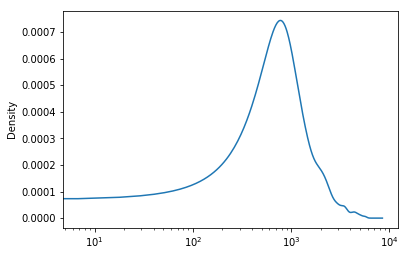

In [43]:
review_lengths.plot(kind='kde', logx=True)

In [44]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer())
                   ])

pipeline.set_params(**{'posf__stop_words': None})
# this is equivalent to pipeline.set_params(posf__stop_words=None), read about the * operator in python and what it does
# https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews = pipeline.fit_transform(cleaned_reviews)

In [45]:
pipeline.named_steps

{'cv': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.95, max_features=None, min_df=0.01,
         ngram_range=(1, 1), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'posf': PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
           stop_words=None)}

In [48]:
pipe_cv = pipeline.named_steps['cv']

In [49]:
preproc_reviews.shape

(1000, 1530)

so we have 1000 rows and 1530 columns in our bag-of-words data. What if we want to get a count of all the words (not filtered) in the preprocessed data per article (row)?

In [44]:
sum_across_rows = preproc_reviews.sum(axis=1)
print('Shape of result: ', sum_across_rows.shape)
sum_across_rows[:10]

Shape of result:  (1000, 1)


matrix([[163],
        [ 66],
        [129],
        [112],
        [144],
        [ 40],
        [ 51],
        [ 56],
        [ 55],
        [ 18]], dtype=int64)

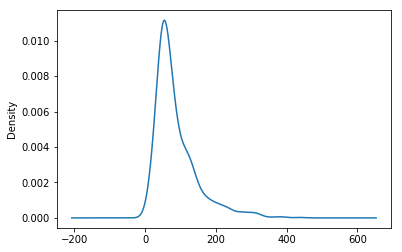

In [45]:
pd.Series(sum_across_rows.A1).plot(kind='kde')

What if we want to see the total number of times a word was used in the data?

In [50]:
sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape

(1, 1530)

In [51]:
counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))

In [52]:
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('pron', 3301),
 ('have', 2498),
 ('film', 1964),
 ('movie', 1906),
 ('do', 1615),
 ('good', 1036),
 ('see', 881),
 ('make', 871),
 ('that', 869),
 ('who', 849)]

What is pron? Is it the internet slang for porn or could it be from somewhere else? How would you figure it out?

Again, we can see that some of the terms in our top 10 are probably useless for guessing whether or not a review is positive or negative. We might consider adding some of those terms to our stopwords.

Here's an idea. What if you looked at how many times a word appeared in a positive review vs how many times it appeared in negative review?

say for each word you calculate a score, maybe something like this:
(|positive uses| - |negative uses|) / min(|positive uses|, |negative uses|) 

Say a word appeared in 40 positive reviews (or 40 times in positive reviews, test both) and 20 negative reviews
It's score would be (40 - 20)/20 = 1

Say a word appeared in 80 negative reviews and 20 positive reviews
It's score would be (20 - 80)/20 = -3

Say a word appeared in 60 negative reviews and 60 positive reviews
It's score would be (60 - 60)/60 = 0

The closer the score is to zero, the less it appeared in one type of review more than the other and perhaps this is an indicator of it not providing much information (signal) to the machine learning model. Maybe you could use this to filter out "useless" terms. Keep in mind though, perhaps a word just got unlucky and it happens to appear a lot with conflicting words. Either way, these are things you should try to think about and experiment with in your projects.

# Let's Build Some Models

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()

lr.fit(preproc_reviews, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Well, how did we do?

Let's test it on some of our training data:

In [55]:
training_test = X.sample(5, random_state=42)
training_test_labels = y.loc[training_test.index]

However, remember that our model was training on preprocessed data in a bag-of-words representation so we'd need to transform the data we want to test the model with in the same exact way.

In [56]:
preproc_training_test = pipeline.transform(training_test)

In [57]:
lr.score(preproc_training_test, training_test_labels)

1.0

### WOW! A perfect score!

The better your model does, the more skeptical you should be.

Let's see how we do over all of the training data.

In [58]:
lr.score(preproc_reviews, y)

1.0

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
conf_matrix = confusion_matrix(y, lr.predict(preproc_reviews), labels=[0, 1])
conf_matrix

array([[518,   0],
       [  0, 482]], dtype=int64)

In [61]:
# a much prettier representation of the confusion matrix
# props to this guy: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

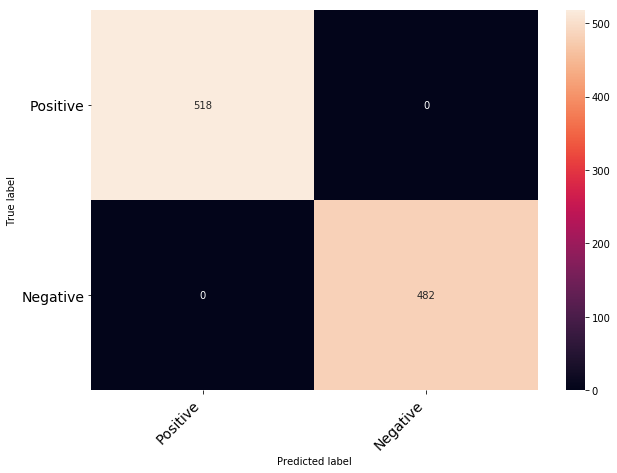

In [58]:
print_confusion_matrix(conf_matrix, ['Positive', 'Negative'])

So there were only two errors made, 2 false positives. Here's where you'd be overly impressed with yourself and your results (we've all done this).

However, let's see how our model does on data it's never seen before.

![](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

When comparing models, two popular metrics that are used are the area under the Precison-Recall curve and the area under the Receiving Operating Characteristic (ROC) curve. In both cases, area under the curve is abbreviated AUC. See here for more details:<br>
http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#plot-the-precision-recall-curve<br>
http://blog.yhat.com/posts/roc-curves.html
<br>
<br>
Explanations of each here:<br>
https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/<br>
https://classeval.wordpress.com/introduction/introduction-to-the-roc-receiver-operating-characteristics-plot/

In [62]:
from sklearn.model_selection import cross_validate

In [63]:
scores = cross_validate(lr, preproc_reviews, y, cv=10, 
                        scoring=['f1', 'precision', 'recall', 'accuracy'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.03124142, 0.03127956, 0.0312531 , 0.01562929, 0.01562047,
        0.01562309, 0.0156188 , 0.01565218, 0.01565194, 0.01562929]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_accuracy': array([0.82178218, 0.81188119, 0.82      , 0.75      , 0.77      ,
        0.69      , 0.77      , 0.81      , 0.80808081, 0.75757576]),
 'test_f1': array([0.80851064, 0.8       , 0.81632653, 0.7311828 , 0.77669903,
        0.68686869, 0.78095238, 0.8       , 0.81188119, 0.74468085]),
 'test_precision': array([0.84444444, 0.82608696, 0.8       , 0.75555556, 0.72727273,
        0.66666667, 0.71929825, 0.80851064, 0.77358491, 0.76086957]),
 'test_recall': array([0.7755102 , 0.7755102 , 0.83333333, 0.70833333, 0.83333333,
        0.70833333, 0.85416667, 0.79166667, 0.85416667, 0.72916667]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'train_f1': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'train_precision': array([1., 1., 1., 1., 

As you can see above, the model does much worse on data it's never seen before. This is a good indicator that the model has overfit the data.

Let's try to find some optimal hyperparameters for this model.

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
import numpy as np

np.linspace(1e-5, 1e5, 10)

array([1.00000000e-05, 1.11111111e+04, 2.22222222e+04, 3.33333333e+04,
       4.44444445e+04, 5.55555556e+04, 6.66666667e+04, 7.77777778e+04,
       8.88888889e+04, 1.00000000e+05])

In [68]:
# use the parameter grid to set all the values you want to test, GridSearchCV will iterate through every possible combination.

param_grid = {'C': np.linspace(1e-5, 1e5, 10), 'penalty': ['l1', 'l2']}

grid = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=-1)

In [69]:
grid.fit(preproc_reviews, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-05, 1.11111e+04, 2.22222e+04, 3.33333e+04, 4.44444e+04,
       5.55556e+04, 6.66667e+04, 7.77778e+04, 8.88889e+04, 1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
grid.best_params_

{'C': 11111.11112, 'penalty': 'l1'}

In [71]:
grid.cv_results_['mean_test_score']

array([0.518, 0.673, 0.748, 0.73 , 0.736, 0.726, 0.724, 0.725, 0.726,
       0.726, 0.727, 0.726, 0.726, 0.727, 0.718, 0.727, 0.723, 0.727,
       0.74 , 0.727])

#### ~74% accuracy is the best we could do for the all the sets of hyperparameter combinations tested. Let's try some different models.

In [72]:
from sklearn.svm import SVC

In [76]:
svc = SVC()

scores = cross_validate(svc, preproc_reviews, y, cv=10, n_jobs=-1)

In [77]:
scores

C:\Users\peluc\Anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.50008154, 0.51568103, 0.51567721, 0.50008154, 0.51565313,
        0.48443198, 0.54898739, 0.59009957, 0.55884624, 0.54321814]),
 'score_time': array([0.04688954, 0.04690361, 0.04688239, 0.04687881, 0.04688096,
        0.04690838, 0.04688668, 0.06250668, 0.0625062 , 0.04688144]),
 'test_score': array([0.74257426, 0.73267327, 0.72      , 0.67      , 0.67      ,
        0.64      , 0.74      , 0.67      , 0.68686869, 0.63636364]),
 'train_score': array([0.7753059 , 0.76307008, 0.76      , 0.77444444, 0.77555556,
        0.77555556, 0.77666667, 0.77555556, 0.76581576, 0.77802442])}

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier()

scores = cross_validate(rf, preproc_reviews, y, cv=10, n_jobs=-1, return_train_score=True)

scores

{'fit_time': array([0.07813144, 0.06250644, 0.06252193, 0.0468812 , 0.0468576 ,
        0.04690361, 0.06250596, 0.04687715, 0.07813001, 0.06253004]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01560163, 0.        , 0.        , 0.        ]),
 'test_score': array([0.66336634, 0.6039604 , 0.77      , 0.6       , 0.67      ,
        0.61      , 0.7       , 0.69      , 0.6969697 , 0.72727273]),
 'train_score': array([0.99221357, 0.99110122, 0.99      , 0.99777778, 0.99444444,
        0.99666667, 0.99555556, 0.99111111, 0.99112098, 0.98890122])}

It doesn't seem like any of the models are doing too well. Now would be the time where you start questioning the preprocessing that you did to the data. You can tune the hyperparameters of your transformers just like you can with your estimators.

In [80]:
pipe = Pipeline([('posf', PartOfSpeechFilter()),
                 ('cv', CountVectorizer()),
                 ('rf', RandomForestClassifier())
                ])

In [81]:
param_grid = [{'cv__max_df': np.linspace(0.95, 1.0, 2), 'cv__min_df': np.linspace(0.0, 0.05, 2),}]
#                'rf__min_samples_split': range(2, 50, 5)
#               },
#               {'cv__min_df': np.linspace(0.0, 0.05, 5), 'rf__max_depth': np.linspace(5, 100, 5),
#                'posf__parts_of_speech': [{'NOUN', 'PROPN', 'ADJ', 'VERB'}, 
#                                          {'ADJ', 'ADV', 'VERB'}
#                                         ]
#               }
#              ]

grid = GridSearchCV(pipe, param_grid=param_grid, verbose=2)

In [76]:
grid.fit(X=cleaned_reviews, y=y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] cv__max_df=0.95, cv__min_df=0.0 .................................
[CV] .................. cv__max_df=0.95, cv__min_df=0.0, total= 1.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] cv__max_df=0.95, cv__min_df=0.0 .................................
[CV] .................. cv__max_df=0.95, cv__min_df=0.0, total= 1.2min
[CV] cv__max_df=0.95, cv__min_df=0.0 .................................
[CV] .................. cv__max_df=0.95, cv__min_df=0.0, total= 1.2min
[CV] cv__max_df=0.95, cv__min_df=0.05 ................................
[CV] ................. cv__max_df=0.95, cv__min_df=0.05, total= 1.2min
[CV] cv__max_df=0.95, cv__min_df=0.05 ................................
[CV] ................. cv__max_df=0.95, cv__min_df=0.05, total= 1.1min
[CV] cv__max_df=0.95, cv__min_df=0.05 ................................
[CV] ................. cv__max_df=0.95, cv__min_df=0.05, total= 1.2min
[CV] cv__max_df=1.0, cv__min_df=0.0 ..................................
[CV] ................... cv__max_df=1.0, cv__min_df=0.0, total= 1.2min
[CV] cv__max_df=1.0, cv__min_df=0.0 ..................................
[CV] ................... cv__max_df=1.0, cv__min_df=0.0, total= 1.1min
[CV] c

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 23.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=None)), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_f...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'cv__max_df': array([0.95, 1.  ]), 'cv__min_df': array([0.  , 0.05])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

This runs VERY SLOWLY on Windows since you can't use n_jobs=-1. When try to use parallel processing for GridSearchCV with a Pipeline in Windows, the interpreter will stop responding. There is a workaround however. Whenever you run code like this it needs to be within a `if __name__ == '__main__'` block. In other words, you can't use this in Jupyter. You'll have to write a .py script. See here for more details:<br>
https://github.com/scikit-learn/scikit-learn/issues/2889#issuecomment-37311446<br>
https://docs.python.org/2/library/multiprocessing.html#windows

In [77]:
grid.best_params_

{'cv__max_df': 1.0, 'cv__min_df': 0.0}

In [80]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=None)), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_f...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

Here's where you can plot a ROC or Precision-Recall curve and calculate the AUC. You can then repeat these steps for other models and compare your AUCs. The one with the highest AUC can be argued to be the best model. Be sure to calculate this AUC on your test data set not the training set.

# Machine Learning Algorithms

#### In the final machine learning lecture, we will cover these algorithms (and more) in detail one by one. However, in the meantime, I suggest that you look into each one. Introduction to Statistical Learning covers all of these algorithms. In addition, you can find very helpful explanatory videos on YouTube for most of these topics.

## Supervised Learning

- kNN (Classification and Regression)
- Linear and Logistic Regression
- Support Vector Machines (for classification and regression)
- Using Stochastic Gradient Descent for Classification and Regression (see SGDClassifier and SGDRegressor in Scikit)
- Naive Bayes
- Decision Trees
    - Random Forests

## Unsupervised Learning

- [k-Means clustering](https://www.youtube.com/watch?v=_aWzGGNrcic)
- [Mean shift clustering](https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/)
- [Singular Value Decomposition (Matrix Factorization)](http://www.ams.org/publicoutreach/feature-column/fcarc-svd)
    - Principal Components Analysis
    - Latent Semantic Analysis